# Data Analysis - Genres

## Cargando dataset y preparación

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import altair as alt

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe ya limpio desde el análisis de Features
data_ana_corona = pd.read_csv("data_ana_coronaperiod.csv", sep = ',', parse_dates=['release_date_year'])
data_ana_corona = data_ana_corona.drop(columns=['Unnamed: 0'])

print('Tamaño inicial: ',data_ana_corona.shape)
data_ana_corona.sample(2)

Tamaño inicial:  (1581, 37)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
1036,Guerrera,DELLAFUENTE,105796,2018-03-13,3Q6zROQvMXRtR9NYfDpNWL,2018,6470177,Guerrera,2017-12-14,0.344807,0.61,0.1650,0.760,0.605,0.0,0.185,0.818122,0.041691,0.644,0.351731,4,2017-01-01,trap espanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trap espanol,4bJh7sMPcVRiqe5jlnsWQV,324370,0.696970,0.009193
664,Si Ella Quisiera - Remix,Justin Quiles,20456,2017-03-13,0A2h9QjoPdbVwa9LFiijqM,2017,1029382,Si Ella Quisiera (Remix),2016-11-11,0.402406,0.00,0.0385,0.777,0.687,0.0,0.134,0.833060,0.070932,0.692,0.184084,4,2016-01-01,latin,reggaeton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton",14zUHaJZo1mnYtn6IBRaRP,1935427,0.909091,0.002432


# Pregunta 2: ¿Han cambiado los géneros más escuchados entre diferentes años?

En la extracción hemos metido cada género del artista en una columna para facilitar el análisis, siendo, genre1, genre2, genre3... Por si acaso, hemos dejado una columna con la lista completa de genres como un string.

De los artistas hemos extraido los géneros en los que están clasificados en Spotify, que no nos dice solo uno, sino hasta 10 diferentes, lo que nos dificulta destacar porque algunos artistas tienen hasta 7 géneros asignados que pueden coincidir o no con otros artistas. Esto puede desvirtuar el análisis y dificultar la agrupación de estilos, porque si, por ejemplo, una canción puede tener como genre1 un género muy específico (ej. colombian pop) y está como el primero en la lista del artista, en vez de un género más general (ej. pop).


((Fuente externa Most popular genres:
1	☊	pop
2	☊	dance pop
3	☊	rap
4	☊	pop rap
5	☊	rock
6	☊	post-teen pop
7	☊	latin
8	☊	hip hop
9	☊	trap
10	☊	edm
11	☊	modern rock
12	☊	tropical house
13	☊	pop rock
14	☊	melodic rap
15	☊	reggaeton
16	☊	latin pop
17	☊	classic rock
18	☊	electropop
19	☊	mellow gold
20	☊	album rock
http://everynoise.com/everynoise1d.cgi?vector=popularity&scope=all))

In [26]:
# Echamos un primer vistazo a las columnas
print(data_ana_corona.shape)
data_ana_corona[data_ana_corona['genre2'] =='latin'].head(3)

(1581, 37)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
298,Coronao Now (Remix),El Alfa,82555,2020-03-13,047WmwIeerHyIUstFAEz5A,2020,3143292,Coronao Now (Remix),2020-02-12,0.451159,0.71,0.255,0.883,0.853,0.000723,0.412,0.862410,0.209612,0.695,0.371194,4,2020-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1122213,0.838384,0.002806
299,4K,El Alfa,56099,2020-03-13,4xI3U4sDj1TPmO9Iz5TkYp,2020,4475589,4K,2020-03-12,0.326357,0.81,0.357,0.925,0.900,0.005950,0.124,0.875936,0.174870,0.804,0.384744,4,2020-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1122213,0.838384,0.003995
300,Coronao Now,El Alfa,46034,2020-03-13,7FbKipScVxkjQxQXwTd0gL,2020,446298,Coronao Now,2019-11-07,0.368363,0.70,0.146,0.941,0.729,0.004510,0.180,0.770913,0.322525,0.718,0.371348,4,2019-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1122213,0.838384,0.000398


In [27]:
# Vemos los artistas que más veces salen 
data_ana_corona.Artist.value_counts()

Bad Bunny        44
J Balvin         31
Ozuna            28
C. Tangana       25
Ed Sheeran       22
                 ..
Dennis Lloyd      1
Years & Years     1
Martin Jensen     1
George Ezra       1
NF                1
Name: Artist, Length: 452, dtype: int64

In [28]:
#Contamos el número de canciones para cada género analizando la columna genre1 y siguientes
number_genres = data_ana_corona.genre1.value_counts()
# number_genres = data_ana_corona.genre2.value_counts()
# number_genres = data_ana_corona.genre3.value_counts()
number_genres.head(60)

latin                        369
dance pop                    201
colombian pop                 83
spanish pop                   65
pop                           57
trap espanol                  55
cantautor                     54
latin pop                     48
latin arena pop               34
big room                      31
r&b en espanol                28
canadian contemporary r&b     22
spanish hip hop               22
argentine hip hop             21
canadian hip hop              19
electropop                    19
flamenco urbano               18
reggaeton                     17
modern rock                   15
rap espanol                   14
eurovision                    13
dfw rap                       13
dominican pop                 13
boy band                      12
conscious hip hop             12
champeta                      11
garage rock                   11
canadian pop                  11
panamanian pop                11
trap latino                   10
emo rap   

Tras analizar los valores principales, vemos que el género "latin" es muy ambiguo y no nos ayuda a distinguir, por lo que decido que para depurar el género definitivo así: a los que en el genre1 sea "latin", se les asignará el valor en genre2, que es más específico y los que el genre1 no sea latin se les asignara ese genre1. También si en el genre2 es "latin pop", que se seleccione el genre3

In [29]:
# Aplicación de agrupación 1
data_ana_nolatinfirst = data_ana_corona[data_ana_corona['genre1'] != 'latin']
data_ana_latinfirst = data_ana_corona[data_ana_corona['genre1'] == 'latin']

data_ana_corona.loc[data_ana_corona.genre1 == 'latin', 'genre_depurated'] = data_ana_latinfirst['genre2']
data_ana_corona.loc[data_ana_corona.genre2 == 'latin pop', 'genre_depurated'] = data_ana_latinfirst['genre3']
data_ana_corona.loc[data_ana_corona.genre1 != 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre1']
data_ana_corona.head(2)

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated
0,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982,Tusa,2019-11-07,0.324972,0.91,0.295,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,0.017033,reggaeton
1,Follow,KAROL G,152745,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,6900319,Follow,2020-04-01,0.330442,0.78,0.667,0.735,0.787,0.000006,0.0721,0.875476,0.198031,0.455,0.711901,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,0.006159,reggaeton


Por otro lado, he decidido elegir los siguientes géneros en losq ue agrupar todos los géneros: POP, DANCEPOP, ROCK, RAP, CANTAUTOR Y REGAETTON. Evidentemente este es un agrupamiento subjetivo y teniendo en cuanto los géneros que aparece más en genre1 y que podemos distinguir fácilmente entre ellos. Por ejemplo, "reggaeton" podría entrar tambien en "dance", pero se ha decidido separarlo por el volumen de menciones a este género y se ha agrupado con similares.

Para hacer esta nueva categorización he tenido en cuenta el texto de los géneros, tras observar que muchos de ellos eran variante de otros generales, por ejemplo, classic rock, atl hiphop, panamanian pop... Los géneros que están mencionamos menos o que son difíciles de categorizar, por ejemplo el brostep, se han dejado en "Others"

In [30]:
# Aplicación de agrupación 2

#Quitamis un warning deprecated que nos sale
import warnings
warnings.filterwarnings('ignore')

# Grupos de géneros:
list_genres_pop = 'pop, k-pop, boy band, eurovision, carnaval'
list_genres_dance = 'dance, tropical, edm, electropop, big room'
list_genres_rock = 'rock, indie'
list_genres_reggaeton = 'dembow, reggaeton, champeta, cubaton'
list_genres_rap = "rap, hip hop, funk, trap, r&b"
cantautor = 'cantautor, flamenco'

# Reglas de categorización (busqué formas de hacerlo más nuevas, pero no cosneguí que funcionara)
data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre_depurated.str.contains("dance"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("tropical"), 'dance',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("edm"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("electropop"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("big room"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("new french"), 'dance',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("k-pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("carnaval"), 'pop',                      
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("eurovision"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("boy band"), 'pop',
                        
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rock"), 'rock',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("indie"), 'rock',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("bachata"), 'reggaeton',                               
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("dembow"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("reggaeton"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("champeta"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cubaton"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rumba"), 'reggaeton',                        
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("hip hop"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("funk"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("trap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("r&b"), 'hip hop',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cantautor"), 'cantautor',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("flamenco"), 'cantautor',            
                                    
                                          "other"))))))))))))))))))))))))))

# Vemos unas pruebas
data_ana_corona[data_ana_corona['genre_depurated'] == 'dembow']
data_ana_corona[data_ana_corona['genre_depurated'] == 'new french touch']

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated,genre_depurated_final
1203,Sunset Lover,Petit Biscuit,30275,2019-03-24,3WRQUvzRvBDr4AxMWhXc5E,2019,93856,Presence,2017-11-10,0.422277,0.75,0.6690,0.785,0.525,0.439000,0.1140,0.771044,0.027215,0.251,0.189796,4,2017-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",6gK1Uct5FEdaUWRWpU4Cl2,778983,0.737374,0.000101,new french touch,dance
1374,Katchi - Ofenbach vs. Nick Waterhouse,Ofenbach,29729,2018-03-13,2NF8A7C6tICScdRaZ0BrEe,2018,1382876,Katchi (Ofenbach vs. Nick Waterhouse),2017-08-25,0.196887,0.68,0.0261,0.837,0.793,0.000090,0.0743,0.853381,0.048494,0.870,0.417863,4,2017-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",4AKwRarlmsUlLjIwt38NLw,346526,0.727273,0.001965,new french touch,dance
1375,Be Mine,Ofenbach,16107,2017-04-17,2KklXplRtxMsBYo474Es0w,2017,338435,Be Mine,2016-11-25,0.223328,0.71,0.1940,0.779,0.666,0.000556,0.0576,0.777446,0.036190,0.507,0.404741,4,2016-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",4AKwRarlmsUlLjIwt38NLw,346526,0.727273,0.000800,new french touch,dance


Vemos cómo queda ahora distribuidos los géneros y se ve algo más claro. Pero ojo, esto es un simple conteo de cuantas veces aparece un género y no se tiene en cuenta el número de veces que se ha escuchado cada canción, para ello tendremos que ponderar por el número de streams total de cada canción y trasladarlo a los géneros.

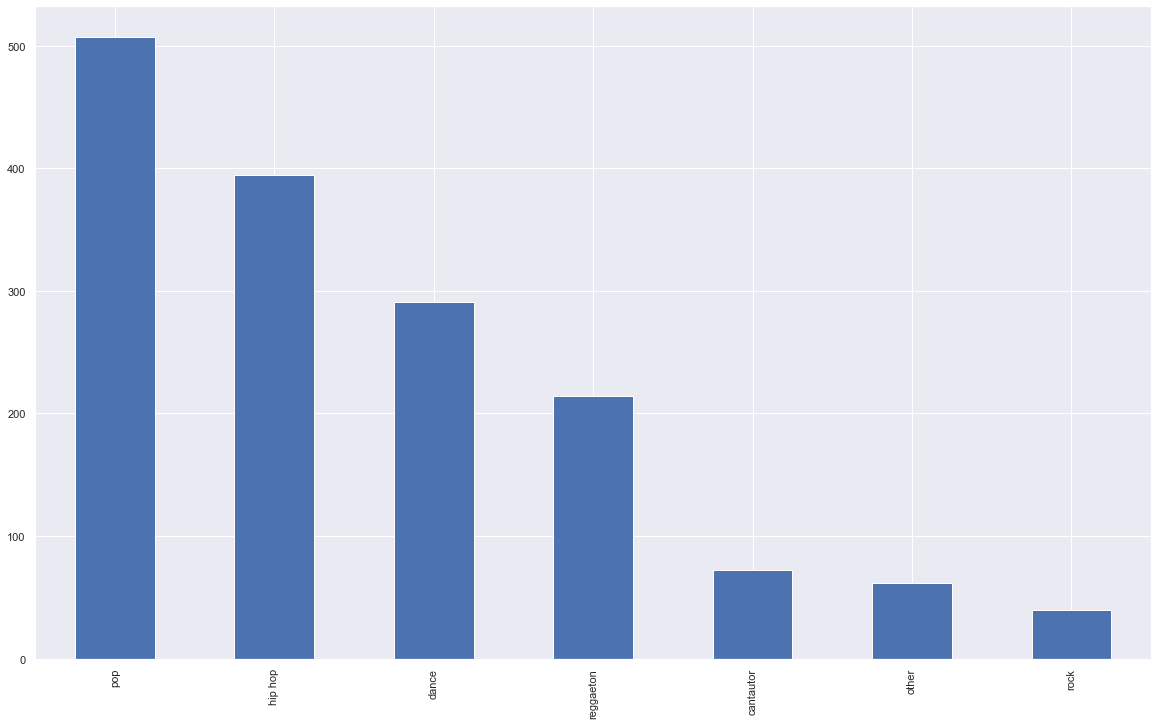

In [31]:
number_genres_new = data_ana_corona.genre_depurated_final.value_counts()
number_genres_new.plot.bar()
plt.show()


In [32]:
# Exportamos dataframe con genre para usar en otro análisis más tarde
# data_ana_corona.to_csv("data_ana_coronaperiod_withgenre.csv", sep = ',')

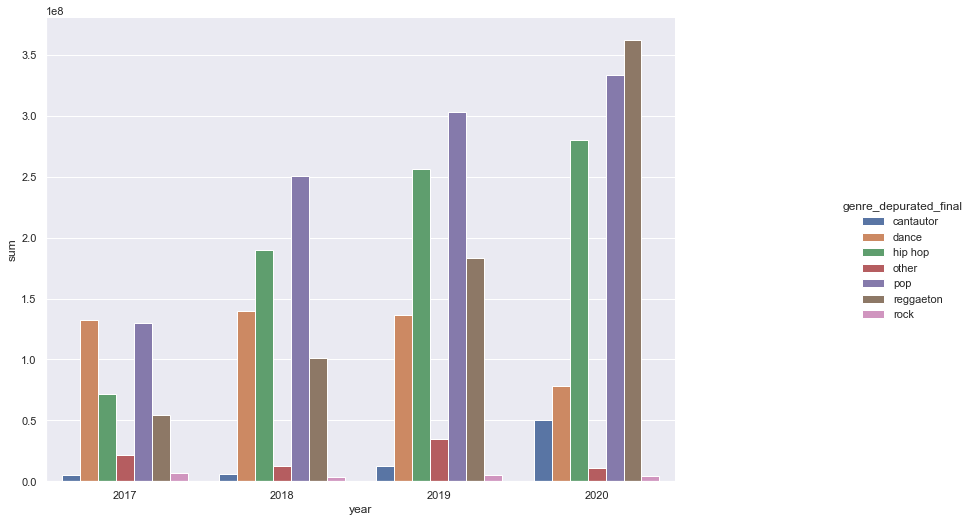

In [33]:
# Vamos a ver los pesos que tienen por años, respecto a los streams
data_group_streamstotal = data_ana_corona.groupby(['genre_depurated_final','year']).agg(['sum', 'count'])

# Vamos a resetear el index para poder analizar mejor
data_group_streamstotal2 = data_group_streamstotal['Streamstotal']
data_group_streamstotal2.reset_index(inplace=True)

#Y hacemos cálculo de los streams totales de cada género depurado
graph_genre = sns.catplot(x='year', y='sum', hue='genre_depurated_final', data=data_group_streamstotal2, kind='bar')
graph_genre.fig.set_size_inches(15,8)

Pero lo anterior tiene también el problema de que en el 2020 hay más streams totales, entonces habría que hacer proporcional a su total de streams por año.

In [34]:
# Creo una función para extraerlo más fácil donde se mete el año y el género:
def extract_percentage(year, genre):
    datos_ano = data_group_streamstotal2[data_group_streamstotal2['year'] == year]
    percentage = 100 * datos_ano[datos_ano['genre_depurated_final'] == genre].sum()[2]/ data_group_streamstotal2[data_group_streamstotal2['year'] == year].sum()[2]
    return [year, genre, percentage]

# Y otra función para crear el dataframe resultante por año
def create_df_year(year):
    list_genres = ['pop', 'dance', 'rock','reggaeton','hip hop','cantautor', 'other']
    data_1 = extract_percentage(year, list_genres[0])
    data_2 = extract_percentage(year, list_genres[1])
    data_3 = extract_percentage(year, list_genres[2])
    data_4 = extract_percentage(year, list_genres[3])
    data_5 = extract_percentage(year, list_genres[4])
    data_6 = extract_percentage(year, list_genres[5])
    data_7 = extract_percentage(year, list_genres[6]) 
    df_new = pd.DataFrame([data_1, data_2,data_3,data_4,data_5,data_6,data_7,], columns = ['year', 'genre', 'percentage'])
    return df_new

# Guardo dataframes
data_genre_2017 = create_df_year(2017)
data_genre_2018 = create_df_year(2018)
data_genre_2019 = create_df_year(2019)
data_genre_2020 = create_df_year(2020)

# Junto dataframes
data_genre_years = pd.concat([data_genre_2017, data_genre_2018, data_genre_2019, data_genre_2020])

# Comprobamos que está bien
print(data_genre_years.groupby('year').sum())

# Hago función para que me saque el gráfico de cada género
'''genre_list = ['pop', 'dance','rock','reggaeton','hip hop', 'cantautor', 'other']
def graph_genre(genre):
    data_genre = data_genre_years[data_genre_years['genre'] == genre]
    sns.catplot(x="year", y="percentage", data=data_genre, height=6, kind="bar", palette="muted")
    plt.title(genre)
    return

for genre in genre_list:
    graph_genre(genre)'''

      percentage
year            
2017       100.0
2018       100.0
2019       100.0
2020       100.0


'genre_list = [\'pop\', \'dance\',\'rock\',\'reggaeton\',\'hip hop\', \'cantautor\', \'other\']\ndef graph_genre(genre):\n    data_genre = data_genre_years[data_genre_years[\'genre\'] == genre]\n    sns.catplot(x="year", y="percentage", data=data_genre, height=6, kind="bar", palette="muted")\n    plt.title(genre)\n    return\n\nfor genre in genre_list:\n    graph_genre(genre)'

A partir de aquí decidí probar y hacer los gráficos y análisis directamente con Tableau y crear un dashboard con los datos, y lo he insertado aquí con una imagen, el archivo de Tableau está en la carpeta raíz

In [35]:
# Exportamos para ver en Tableau
data_genre_years.to_csv("tableau_graph_and_analysis/data_totableau3_coronaperiod.csv", sep = ',')

<img src="tableau_graph_and_analysis/dashboard_pandemia.png" style="width: 1200px;">

De primeras, más que diferencias entre periodos, lo que se puede ver que las tendencias que han seguido en los últimos 4 años, y solo ha habido cambios de tendencia. Podemos señalar:
- Hiphop: hay una tendendia de aumento pero en el 2020, cambia y se reduce.
- Reggaeton: Hay una tendencia de aumento y en el 2020 hay un aumento drástico.
- Cantautor: Se ve un claro aumento en el 2020.

Si hacemos el mismo calculo pero con el periodo normal, vemos tendencias similares salvo el hiphop, que siempre aumenta, no sufre un bajo como en el periodo pandemia. Esto nos aclara que realmente no ha habido mucho cambio en el género de música que se escuchó.

<img src="tableau_graph_and_analysis/dashboard_normal.png" style="width: 1200px;">

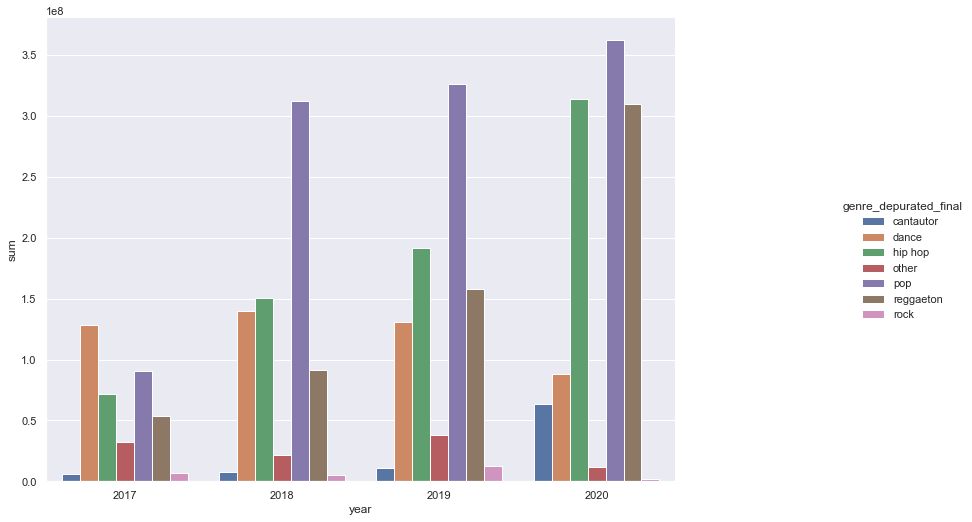

In [22]:
# Script completo para sacar lo mismo pero de Normal Period y guardarlo en CSV
'''# Aplicación de agrupación 1
data_ana_nolatinfirst = data_ana_corona[data_ana_corona['genre1'] != 'latin']
data_ana_latinfirst = data_ana_corona[data_ana_corona['genre1'] == 'latin']

data_ana_corona.loc[data_ana_corona.genre1 == 'latin', 'genre_depurated'] = data_ana_latinfirst['genre2']
data_ana_corona.loc[data_ana_corona.genre2 == 'latin pop', 'genre_depurated'] = data_ana_latinfirst['genre3']
data_ana_corona.loc[data_ana_corona.genre1 != 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre1']
data_ana_corona.head(2)

# Aplicación de agrupación 2

#Quitamis un warning deprecated que nos sale
import warnings
warnings.filterwarnings('ignore')

# Grupos de géneros:
list_genres_pop = 'pop, k-pop, boy band, eurovision, carnaval'
list_genres_dance = 'dance, tropical, edm, electropop, big room'
list_genres_rock = 'rock, indie'
list_genres_reggaeton = 'dembow, reggaeton, champeta, cubaton'
list_genres_rap = "rap, hip hop, funk, trap, r&b"
cantautor = 'cantautor, flamenco'

# Reglas de categorización (busqué formas de hacerlo más nuevas, pero no cosneguí que funcionara)
data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre_depurated.str.contains("dance"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("tropical"), 'dance',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("edm"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("electropop"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("big room"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("new french"), 'dance',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("k-pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("carnaval"), 'pop',                      
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("eurovision"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("boy band"), 'pop',
                        
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rock"), 'rock',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("indie"), 'rock',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("bachata"), 'reggaeton',                               
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("dembow"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("reggaeton"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("champeta"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cubaton"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rumba"), 'reggaeton',                        
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("hip hop"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("funk"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("trap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("r&b"), 'hip hop',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cantautor"), 'cantautor',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("flamenco"), 'cantautor',            
                                    
                                          "other"))))))))))))))))))))))))))

# Vamos a ver los pesos que tienen por años, respecto a los streams
data_group_streamstotal = data_ana_corona.groupby(['genre_depurated_final','year']).agg(['sum', 'count'])

# Vamos a resetear el index para poder analizar mejor
data_group_streamstotal2 = data_group_streamstotal['Streamstotal']
data_group_streamstotal2.reset_index(inplace=True)

#Y hacemos cálculo de los streams totales de cada género depurado
graph_genre = sns.catplot(x='year', y='sum', hue='genre_depurated_final', data=data_group_streamstotal2, kind='bar')
graph_genre.fig.set_size_inches(15,8)

# Creo una función para extraerlo más fácil donde se mete el año y el género:
def extract_percentage(year, genre):
    datos_ano = data_group_streamstotal2[data_group_streamstotal2['year'] == year]
    percentage = 100 * datos_ano[datos_ano['genre_depurated_final'] == genre].sum()[2]/ data_group_streamstotal2[data_group_streamstotal2['year'] == year].sum()[2]
    return [year, genre, percentage]

# Y otra función para crear el dataframe resultante por año
def create_df_year(year):
    list_genres = ['pop', 'dance', 'rock','reggaeton','hip hop','cantautor', 'other']
    data_1 = extract_percentage(year, list_genres[0])
    data_2 = extract_percentage(year, list_genres[1])
    data_3 = extract_percentage(year, list_genres[2])
    data_4 = extract_percentage(year, list_genres[3])
    data_5 = extract_percentage(year, list_genres[4])
    data_6 = extract_percentage(year, list_genres[5])
    data_7 = extract_percentage(year, list_genres[6]) 
    df_new = pd.DataFrame([data_1, data_2,data_3,data_4,data_5,data_6,data_7,], columns = ['year', 'genre', 'percentage'])
    return df_new

# Guardo dataframes
data_genre_2017 = create_df_year(2017)
data_genre_2018 = create_df_year(2018)
data_genre_2019 = create_df_year(2019)
data_genre_2020 = create_df_year(2020)

# Junto dataframes
data_genre_years = pd.concat([data_genre_2017, data_genre_2018, data_genre_2019, data_genre_2020])

# Exportamos para ver en Tableau
data_genre_years.to_csv("tableau_graph_and_analysis/data_totableau3_normalperiod.csv", sep = ',')'''

## Conclusión:

No se puede decir que la pandemia haya provocado un cambio relevante en el tipo de género de música que se escuchaba porque puede estar vinculado a otros factores como pueden ser los nuevos lanzamientos. Pero si hacemos una observación (viendo script de abajo final) sobre esto último con las fechas de lanzamientos de determinados discos (mejor elegir albunes que canciones para agrupar más) y su género, para ver si tienen una vinculación
- En el 2020 hubo dos lanzamientos en el primer trimestre del año que tuvieron mucho éxito y están vinculados a reggaeton, eso puede significar el aumento drástico en los streams de reggaeton.
- En el 2018 el mayor éxito en el periodo estaba vinculado a un grupo de hiphop y de pop, pero en el resto de años es bajo.

En general, parece que el reggaeton está en auge, y el dance y pop en decadencia, sería muy interesante hacer este análisis pero de todo el año para que los lanzamientos de discos en determinados periodos no afecten tanto al análisis.

In [20]:
# Mostramos los albunes más escuchados en el periodo
grouped = data_ana_corona.groupby(['year','genre_depurated_final','album','release_date']).sum().reset_index()
grouped.sort_values('Streamstotal', ascending=False).head(20)

,year,genre_depurated_final,album,release_date,Streams,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
1200,2020,reggaeton,YHLQMDLG,2020-02-28,2940943,111152562,6.342581,15.71,3.4881,15.407,14.528,0.000449,2.7950,17.042974,2.609583,12.369,6.790835,80,485570180,19.595960,0.099210
1160,2020,reggaeton,Colores,2020-03-19,3869381,81693020,2.553552,7.91,1.0669,7.758,7.369,0.693537,1.6856,8.757420,1.622611,6.780,3.892638,41,220798800,9.696970,0.072916
681,2019,hip hop,La Dura Vida del Joven Rapero,2019-01-27,612176,34954623,1.450400,0.55,0.9389,3.023,2.407,0.005618,0.4467,3.140939,0.812102,2.602,1.510232,16,1624356,2.909091,0.037485
843,2019,pop,÷ (Deluxe),2017-03-03,65963,26316688,0.894045,1.73,0.7440,1.424,1.100,0.000000,0.1991,1.726494,0.082513,1.099,0.441869,7,138023254,1.858586,0.028221
969,2020,hip hop,Con Calma,2019-01-24,43454,23813270,0.305140,0.84,0.1100,0.737,0.860,0.000002,0.0574,0.932042,0.052258,0.656,0.210749,4,19671828,0.919192,0.021255
968,2020,hip hop,Con Altura,2019-03-28,52717,23640038,0.224108,0.82,0.3900,0.882,0.689,0.003250,0.0501,0.886901,0.145918,0.746,0.237300,4,3910183,0.828283,0.021100
983,2020,hip hop,Easy Money Baby,2020-01-24,682834,23252651,1.891717,5.03,1.8045,5.655,4.767,0.006439,1.3998,6.052692,1.041257,4.105,2.706630,28,19764857,6.505051,0.020754
489,2018,pop,Despacito (Featuring Daddy Yankee),2017-01-13,25924,21016174,0.394824,0.07,0.2090,0.660,0.786,0.000000,0.1120,0.862935,0.212507,0.846,0.770938,4,8731720,0.808081,0.029862
524,2018,pop,Odisea,2017-08-25,377462,20419563,1.722606,3.63,0.8540,3.685,3.506,0.001739,0.8663,4.234242,0.733353,2.936,2.341235,20,120383860,4.747475,0.029014
1198,2020,reggaeton,Tusa,2019-11-07,432730,19082982,0.324972,0.91,0.2950,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,11614405,0.888889,0.017033
